# Spring

## 2022-05-09

```java
2022-05-09
-------------------------

Spring Web MVC



						핸들러 매핑
						1. url-pattern
						2. form 태그에 있는 name 속성 데이터 전달
화면 ===============> 프론트 컨트롤러(DispatcherServlet) ===============> 사용자 정의 컨트롤서(@Controller)
							화면에서 폼태그를 액션으로 데이터를 사용자 정의
							컨트롤러로 데이터를 넘길때 FORM태그의 name 값과
							사용자 정의 컨트롤러의 name 값이 같아야 한다.
																	MemberVO mvo;
<form>																
<input	type="text"													request.getParameter("mid")
		name="mid"													String mid;
																	mvo.getMId();

화면 <=============== 프론트 컨트롤러(DispatcherServlet) <--- model <---  사용자 정의 컨트롤러(@Controller)
						|					|
						|					|						model m
						view				view resolving			m.addAttribute(key, value);
						${key}|
```

## 2022-05-10

```java
2022-05-10
---------------------------


a.b.c.com.controller					a.b.c.com.service				a.b.c.com.dao
@Controller								@Service("a")					@Repository("d")
@Controller								@Service("service")				@Repository("dAO")
@Controller								@Service						@Repository
사용자정의 콘트롤러 ----------------------> 서비스 --------------------------> 다오 
											Service							DAO
											ServiceImpl						DAOImpl

===============================================================================
Service service = new ServiceImple();		DAO dAO = new DAOImpl();
Service a = new ServiceImple();				DAO d = new DAOImpl();
===============================================================================

@Autowired(required=false)					@Autowired(required=false)
Service service;							DAO dAO;

Context/WEB-INF/web.xml
				DispatcherServlet
				WEB-INF/spring-servlet.xml 

Context/WEB-INF/spring-servlet.xml 
				<mvc
				<context:component-scan base-package="a.b.c.com.**"
```

```
Spring + Mybatis 연동

화면 - F.C - 사용자정의 콘트롤러 - 서비스 - 다오 - 매퍼XML 
--------------------------------------
Spring FrameWork 
									---------------
									Mybatis FrameWork 


라이브러리 
--------------------------------------------
Spring FrameWork library
					Spring + Mybatis 연결 library : mybatis-spring-1.2.2.jar
									Mybatis FrameWork library : mybatis-3.2.4.jar
spring-aop-3.2.9.RELEASE.jar
spring-beans-3.2.9.RELEASE.jar
spring-context-3.2.9.RELEASE.jar
spring-context-support-3.2.9.RELEASE.jar
spring-core-3.2.9.RELEASE.jar
spring-expression-3.2.9.RELEASE.jar
spring-jdbc-3.2.9.RELEASE.jar
spring-tx-3.2.9.RELEASE.jar
spring-web-3.2.9.RELEASE.jar
spring-webmvc-3.2.9.RELEASE.jar

스프링 로그 
	commons-logging-1.1.2.jar
jstl 라이브러리 
	jstl.jar
	standard.jar
컴포넌트 로그 
	log4j-1.2.17.jar
JDBC 
	ojdbc6.jar


환경설정 파일 
--------------------------------------------
Servers/context.xml 
<Resource 	auth="Container"
				type="javax.sql.DataSource" 				
				name="jdbc/jndi_orclHBE00"
				driverClassName="oracle.jdbc.driver.OracleDriver"
				url="jdbc:oracle:thin:@127.0.0.1:1521:orclHBE00"
				username="scott" 
				password="tiger"				 				
				maxActive="100" 
				maxIdle="30" 
				maxWait="10000" />



Context/WEB-INF/web.xml
Context/WEB-INF/spring-servlet.xml <-- 스프링 환경 설정파일 
Context/WEB-INF/servlet-context.xml <-- 마이바티스 환경 설정파일 


servlet-context.xml
=============================
<?xml version="1.0" encoding="UTF-8"?>
<beans 	xmlns="http://www.springframework.org/schema/beans"
		xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
		xmlns:context="http://www.springframework.org/schema/context"
		xmlns:tx="http://www.springframework.org/schema/tx"
		xsi:schemaLocation="http://www.springframework.org/schema/beans 
							http://www.springframework.org/schema/beans/spring-beans.xsd
							http://www.springframework.org/schema/context 
							http://www.springframework.org/schema/context/spring-context.xsd
							http://www.springframework.org/schema/tx 
							http://www.springframework.org/schema/tx/spring-tx.xsd">


	<bean id="dataSource" class="org.springframework.jndi.JndiObjectFactoryBean">
		<property name="jndiName" value="java:comp/env/jdbc/jndi_orclHBE00"></property>
	</bean>
	
	<!-- 마이바티스 쿼리문 찾아서 연결하기  -->
	<bean id="sqlSessionFactory" class="org.mybatis.spring.SqlSessionFactoryBean">
		<property name="dataSource" ref="dataSource"></property>
		<!-- 
			classpath: == springEmp/Java Resources/src 
			mybatisconfig 폴더 만들기 
			springEmp/Java Resources/src 에서 우클릭 New -> Other -> Select a wizard -> folder 검색
		 -->	 	
		<property name="configLocation" value="classpath:/mybatisconfig/mybatis-config.xml"></property>		
		<property name="mapperLocations" value="classpath:/mybatisquery/*.xml"></property>				
	</bean>
	
	<!-- 트랜잭션 처리 : spring-mybatis 에서는 개발자가 tx 처리에 관여하지 않는다. -->
	<bean id="transactionManager" 
	      class="org.springframework.jdbc.datasource.DataSourceTransactionManager">
			<property name="dataSource" ref="dataSource"></property>
	</bean>
	
	<!-- DAO 또는 Mapper 찾기  -->
	<bean class="org.mybatis.spring.mapper.MapperScannerConfigurer">
		<property name="basePackage"><value>a.b.c.com.**.dao</value></property>
	</bean>
</beans>


매퍼 xml 
-------------------------------------------------
mybatis-config.xml
---------------------------------------------------
<?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE configuration PUBLIC "-//mybatis.org//DTD Config 3.0//EN" 
		  "http://mybatis.org/dtd/mybatis-3-config.dtd">

<configuration>
	<typeAliases>
		<typeAlias type="a.b.c.com.emp.vo.SpringEmpVO" alias="springempvo"/>	
	</typeAliases>
</configuration>


spring_emp.xml
---------------------------------------------------
<?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE mapper PUBLIC "-//mybatis.org//DTD Mapper 3.0//EN" 
          "http://mybatis.org/dtd/mybatis-3-mapper.dtd">
          
<mapper namespace="a.b.c.com.emp.dao.SpringEmpDAO">

<!-- 
sqlSession.selectList("springEmpSelectAll");
 -->
<select id="springEmpSelectAll" resultType="springempvo">
	SELECT 
	       	A.EMPNO        	EMPNO
           ,A.ENAME        	ENAME
           ,TO_CHAR(TO_DATE(A.HIREDATE), 'YYYY-MM-DD')  	HIREDATE
  	 FROM   EMP A			
</select>

<!-- 
sqlSession.selectList("springEmpSelect", evo);
 -->
<select id="springEmpSelect" parameterType="springempvo" resultType="springempvo">
	SELECT 
					 A.EMPNO        	 EMPNO
					,A.ENAME        	ENAME
					,TO_CHAR(TO_DATE(A.HIREDATE), 'YYYY-MM-DD')  	HIREDATE
	FROM   EMP A	
	WHERE  1=1	
  	<if test="searchFilter=='key_01'">
		<![CDATA[ AND A.EMPNO LIKE '%' || #{keyword, jdbcType=VARCHAR} || '%']]>				
	</if>
	<if test="searchFilter=='key_02'">
		<![CDATA[ AND A.ENAME LIKE '%' || #{keyword, jdbcType=VARCHAR} || '%']]>
	</if>
	<if test="startDate!=null and startDate!='' and endDate!=null and endDate!='' ">
		<![CDATA[ AND TO_CHAR(TO_DATE(A.HIREDATE), 'YYYY-MM-DD') 
					>= TO_CHAR(TO_DATE(#{startDate, jdbcType=VARCHAR}), 'YYYY-MM-DD')]]>
		<![CDATA[ AND TO_CHAR(TO_DATE(A.HIREDATE), 'YYYY-MM-DD') 
					<= TO_CHAR(TO_DATE(#{endDate, jdbcType=VARCHAR}), 'YYYY-MM-DD')]]>
	</if>	
</select>

<insert id="springEmpInsert" parameterType="springempvo">

	INSERT INTO EMP( EMPNO, ENAME, HIREDATE) 
	         VALUES( #{empno, jdbcType=VARCHAR}, #{ename, jdbcType=VARCHAR}, #{hiredate, jdbcType=VARCHAR})
</insert>


<update id="springEmpUpdate" parameterType="springempvo">

	UPDATE EMP SET ENAME=#{ename, jdbcType=VARCHAR}, HIREDATE=#{hiredate, jdbcType=VARCHAR}
	WHERE EMPNO = #{empno, jdbcType=VARCHAR}
</update>
</mapper>
```

## Spring + Mybatis 연동 연습 

```
Spring + Mybatis 연동 연습 
--------------------------------------
Context : empSpring
테이블 : EMP_SPRING
컬럼 : 
EMPNO	VARCHAR2(20)
ENAME	VHRCHAR2(100)
HIREDATE DATE

클래스
패키지
a.b.c.com.emp.controller
	SpringEmpController

a.b.c.com.emp.service
	SpringEmpService
		public List springEmpSelecAll();
		publis List springEmpSelect(SpringEmpVO evo);
		public int springEmpInsert(SpringEmpVO evo);
		public int springEmpUpdate(SpringEmpVO evo);

	SpringEmpServiceImpl

a.b.c.com.emp.dao
	SpringEmpDAO
		public List springEmpSelecAll();
		publis List springEmpSelect(SpringEmpVO evo);
		public int springEmpInsert(SpringEmpVO evo);
		public int springEmpUpdate(SpringEmpVO evo);

	SpringEmpDAOImpl

a.b.c.com.emp.vo
	SpringEmpVO
		private String empno;
		private String ename;
		private String hiredate;

mybatis-config.xml
spring_emp.xml


view
-----------------------
/WEB-INF/view/emp/
springEmpForm.jsp
springEmpInsert.jsp
springEmpInsertForm.jsp

wellcom file
------------------------
WebConent/index.jsp

```

```
작업순서
=======================
1. Context 만들기 : empSpring

2. library 포팅 하기 

spring library
	spring-aop-3.2.9.RELEASE.jar
	spring-beans-3.2.9.RELEASE.jar
	spring-context-3.2.9.RELEASE.jar
	spring-context-support-3.2.9.RELEASE.jar
	spring-core-3.2.9.RELEASE.jar
	spring-expression-3.2.9.RELEASE.jar
	spring-jdbc-3.2.9.RELEASE.jar
	spring-tx-3.2.9.RELEASE.jar
	spring-web-3.2.9.RELEASE.jar
	spring-webmvc-3.2.9.RELEASE.jar

mybatis library
	mybatis-spring-1.2.2.jar <-- Spring + Mybatis 연결 library  
	mybatis-3.2.4.jar <-- Mybatis FrameWork library 
	
JDBC
	ojdbc6.jar

로그4J
	log4j-1.2.17.jar

jstl
	jstl.jar
	standard.jar

스프링로그 
	commons-logging-1.1.2.jar

Context/WebConent/WEB-INF/lib/ 라이브러리 포팅 <-- 이클립스에서는 여기를 사용하지 않는다. 
Context/Java Resources/Libraries <-- 이클립스는 여기에 있는 library를 참조한다. 
	수동으로 Build Path 연결하기 

3. xml 환경설정파일 설정하기 

Servers/server.xml
	<Connector URIEncoding="UTF-8" port="8088"

Servers/web.xml
	<session-timeout>30</session-timeout>
	Default MIME Type Mapping

Servers/context.xml
	<Resource 	auth="Container"
				type="javax.sql.DataSource" 				
				name="jdbc/jndi_spring_orclHBE00"
				driverClassName="oracle.jdbc.driver.OracleDriver"
				url="jdbc:oracle:thin:@127.0.0.1:1521:orclHBE00"
				username="scott" 
				password="tiger"				 				
				maxActive="100" 
				maxIdle="30" 
				maxWait="10000" />

Context/WebContent/WEB-INF/web.xml
							웰컴파일
							디스패처서블릿
							url-patern

							spring-servlet.xml 환경설정파일 호출
							<param-value>/WEB-INF/spring-servlet.xml</param-value>
							
							한글 인코딩 POST 방식 UTF-8
							log4j.xml 세팅


Context/WebContent/WEB-INF/spring-servlet.xml <-- 스프링 환경설정 파일
							mvc 어노테이션
							컨텍스트:컴포넌트 스캔
							뷰 리졸빙 /WEB-INF/view/

							<!-- 마이바티스 환경설정 파일 불러오기  -->
							<import resource="servlet-context.xml"/>

Context/WebContent/WEB-INF/servlet-context.xml <-- 마이바티스 환경설정 파일
							데이터소스 연결
							쿼리xml 연결
							트랜잭션 처리 방법  
							dao 인터페이스 연결 

4. 클래스 만들기 
4.1 vo 만들기
4.2 다오 만들기 
4.2 매퍼 xml 
4.3 서비스 만들기
4.5 콘트롤러 만들기
4.6 view 만들기 
```

### 작업순서


> **1. Context 만들기**

```
empSpring
```

> **2. library 포팅 하기**

**spring library**

```
Spring + Mybatis 연결 library : mybatis-spring-1.2.2.jar
									Mybatis FrameWork library : mybatis-3.2.4.jar

spring-aop-3.2.9.RELEASE.jar
spring-beans-3.2.9.RELEASE.jar
spring-context-3.2.9.RELEASE.jar
spring-context-support-3.2.9.RELEASE.jar
spring-core-3.2.9.RELEASE.jar
spring-expression-3.2.9.RELEASE.jar
spring-jdbc-3.2.9.RELEASE.jar
spring-tx-3.2.9.RELEASE.jar
spring-web-3.2.9.RELEASE.jar
spring-webmvc-3.2.9.RELEASE.jar
```

**mybatis library**

```
commons-logging-1.1.2.jar
```

**JDBC**

```
ojdbc6.jar
```

**log4j**

```
log4j-1.2.17.jar
```

**jstl**

```
jstl.jar
	standard.jar
```

**spring log**

```
commons-logging-1.1.2.jar
```

> **Context/WEB-INF/web.xml**

```
웰컴 파일 
디스패처 서블릿 
url-pattern
spring-servlet.xml 스프링 프레임워크 환경 설정 파일 불러오기
<session-timeout>30</session-timeout>
한글 인코딩 : POST 방식으로 들어오는 스트림 UTF-8
log4j.xml 불러오기 

```

> **servlet-context.xml**

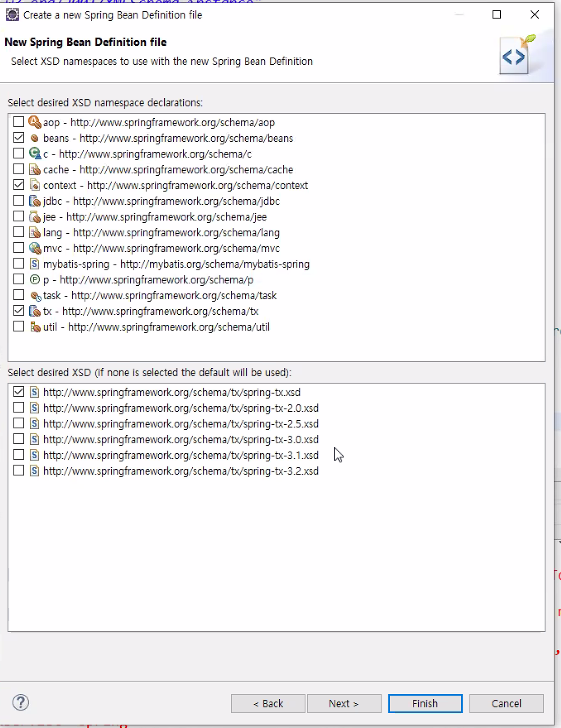